# Lab 2.1

Goals:
* Use arrays to compute approximations of integrals.
* Use graphs and formulas to bound the error of these approximations.
* Understand how the actual error is related to the error bound, and how the shape of the function affects that relationship.
* Use flow-control and the rectangle method to visualize integral approximations.

### Instructions
* With your group, work through each of the questions below.  Most questions include some discussion and some bullet-pointed instructions.  Make sure you carry out the bullet-pointed instructions, because that it what is graded.  
* You are expected to collaborate with your group.  You should arrive at the answers to these questions together.  However, your submitted answers should be expressed in your own words.
* If you need to pause, you can save and come back to your work later.  
* When you are done, select "download .ipynb" from the file menu.  Save the ipynb to your computer, then upload it to the Lab assignment in gradescope.


We will begin by importing the libraries we use for graphing.

In [72]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

Define five algebraic functions by running this cell.  Each person in your group should pick a different one of these functions.  For the rest of the lab, $f(x)$ refers to the function you picked.

In [73]:
def f1(x):
  return x**3 - 6*x**2 + 14*x - 6
  # actual integral: 108.75
def df1(x):
  return 3*x**2 - 12*x + 14

def f2(x):
  return -x**3 + 6*x**2 - 4*x + 20
  # actual integral: 136.25
def df2(x):
  return -3*x**2 + 12*x - 4

def f3(x):
  return -2*x**3 + 24*x**2 - 80*x + 100
  # actual integral: 172.5
def df3(x):
  return -6*x**2 + 48*x - 80

def f4(x):
  return x**4 - 16*x**3 + 96*x**2 - 264*x +300
  # actual integral: 135
def df4(x):
  return 4*x**3 - 48*x**2 + 192*x - 264

def f5(x):
  return -x**3 + 12*x**2 - 57*x + 130
  # actual integral: 188.75
def df5(x):
  return -3*x**2 + 24*x - 57

Hao chosee f5

---


We'll be computing left-hand approximations of $\int_1^6 f(x)~dx$ (where $f$ is your function).

### Q1

* Copy your left-hand approximation code from Exercise 2 of the pre-lab.  
* Modify it to use your function, instead of `f()` (or you can redefine `f()` to be your function),
* Run your code to produce the $L_{10}$ approximation of the integral of your function from 1 to 6.


In [74]:
n = 10
a = 1
b = 6

deltax = (b-a)/n

x = np.arange(a, b, deltax)

# choose f5
def f(x):
  return -x**3 + 12*x**2 - 57*x + 130

left = f(x) * deltax

print(np.sum(left))

# cross-check: when using a much larger n, the L10 approximation is very close to 188.75


209.0625


### Q2


* Define a function `df(x)` which returns the derivative $f'(x)$ at `x`.
* Graph $f(x)$ and $f'(x)$.

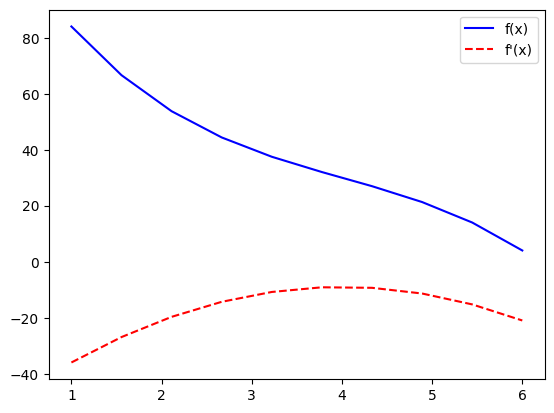

In [75]:

def df(x):
  return -3*x**2 + 24*x - 57

x_vals = np.linspace(a, b, n)

plt.plot(x_vals, f(x_vals), label='f(x)', color = 'blue')
plt.plot(x_vals, df(x_vals), label='f\'(x)', color = 'red', linestyle = '--')
plt.legend()
plt.show()

### Q3

* Look at your graph in Q2.  What bound $S$ can you put on $|f'(x)|$ over the interval $[1,6]$.
* Use $S$ to compute the theoretical error bound of the $L_{10}$ approximation. Look up the formula if you need it.  Since it's good practice, input the arithmetic for this formula into a code cell and compute it there.

In [76]:
def df(x):
  return -3*x**2 + 24*x - 57

x_vals = np.linspace(a, b, n)
dy_vals = df(x_vals)

S = np.max(np.abs(dy_vals))
print("S=", S)

error_bound = S * (b-a)**2/(2*n)
print("Theoretical Error bound for L10 =", error_bound)



S= 36.0
Theoretical Error bound for L10 = 45.0


### Q4

How does the error bound relate to the actual error?  
* Compute $L_{100}$ and $L_{1000}$ approximations of $\int_1^6 f(x)~dx$.  You can reuse your work from Q1.
* The actual value of $\int_1^6 f(x)~dx$ is in a comment in the code cell that defined the five functions.  Compute the actual error of your $L_{10}$, $L_{100}$ and $L_{1000}$ approximations.
* Compute the theoretical error bound of each approximation.
* What percentage of the theoretical error bound is each actual error?
* How does the number of rectangles appear to affect the percentages you computed?  Compare your data to your group-mates and make a general observation, containing specific references to their data.


In [77]:
import pandas as pd

# compute L100
a = 1
b = 6
actual_val = 188.75
x_val = np.linspace(a,b,n)

def f(x):
  return -x**3 + 12*x**2 - 57*x + 130
  # actual integral: 188.75

def df(x):
  return -3*x**2 + 24*x - 57

def formula(n, a, b, actual, x_val):
  deltax = (b-a)/n
  x = np.arange(a, b, deltax)

  # compute Ln approximation
  approx = np.sum(f(x) * deltax)

  # compute actual error
  actual_error = abs(approx - actual_val)

  # compute theoretical bound
  S = np.max(np.abs(df(x_val)))
  error_bound = S * (b-a)**2/(2*n)

  percent_bound = (actual_error/error_bound) * 100

  return approx, error_bound, actual_error, percent_bound

results = {}

for n in [10, 100, 1000]:
  approx, error_bound, actual_error, percent_bound = formula(n, a, b, actual, x_val)
  results[n] = {
      'L10_approx': approx,
      'actual_error': actual_error,
      'error_bound': error_bound,
      'percent_bound': percent_bound
  }

results = pd.DataFrame(results).T
print(results)


      L10_approx  actual_error  error_bound  percent_bound
10    209.062500     20.312500        45.00      45.138889
100   190.753125      2.003125         4.50      44.513889
1000  188.950031      0.200031         0.45      44.451389


Answer:
* For all functions, an increase in the number of rectangles leads to a decrease in both actual errors and error bounds.
* However, the changes in the percentage of actual error in theoretical error bound varies across all functions. The table below shows a comparison across all 5 functions. For function 1 to 3, the percentage increased after increasing the number of rectangles. On the contray, for function 4 and 5, the percentage decreased after increasing the number of rectangles.



<pre>
|f(x)| Actual |          % Bound       |
|    |Integral| n=10 |  n=100 | n=1000 |
---------------------------------------
| 1 | 108.75 | 39.58 | 41.45 | 41.64 | ⇑
| 2 | 136.25 | 11.81 | 13.68 | 13.86 | ⇑
| 3 | 172.5  | 4.17  | 5.41  | 5.54  | ⇑
| 4 | 135    | 64.79 | 58.98 | 58.39 | ↓
| 5 | 188.75 | 45.13 | 44.51 | 44.45 | ↓
<pre>

### Q5

Some functions have an actual error $E_L$ that is a relatively large percentage of the theoretical bound.  Others have $E_L$ that is much smaller than the theoretical bound.  This is our main question:  

> What properties of a function make the actual error $E_L$ a larger or smaller percentage of the theoretical error bound?

* In a text cell, compare your percentages to that of your groupmates, specifically referencing their data.  
* Come up with a conjecture about what properties of your graphs cause the actual error to be a larger or smaller percentage of the theoretical error bound.  
* For full credit, give a plausible mathematical reason why your conjecture might be true.








---
Answer:

*   The percentage is equal to $$
\frac{\text{actual error}}{\text{theoretical error bound}} .$$
That's to say changes in both the denominator and the nominator could infuence the percentage. The key property is the change in the first derivative. The more extreme the first derivative is within the domain, the broader the bound tend to be, and the larger percentage the actual error tends to be within theoretical error bound.
*   For the actual error $E_{L}$, the steeper the function is, the error would be larger. This means when $|f'(x)|$ is large, the function is sharply increasing or decreasing. Also, when $|f''(x)|$ is large, the function's steepness changes more repidly, indicating a larger curvature.
* For the theoretical error bound, since it's formula is $$
E_L \leq max(|f'(x)|)*\frac{(b-a)^2}{2n}, $$
when the function has more curvature, $|f'(x)|$ tends to have more rapid changes. Thus, the error bound tend to be broader and the error is more likely to be larger.
* Thus, in general, if the change in the first derivative is rapid, the actual error will take a larger share of the error bound. However, if the first derivative is relatively flat, without fluactuation and rapid changes, the actual error will be smaller and take a smaller share of the error bound.


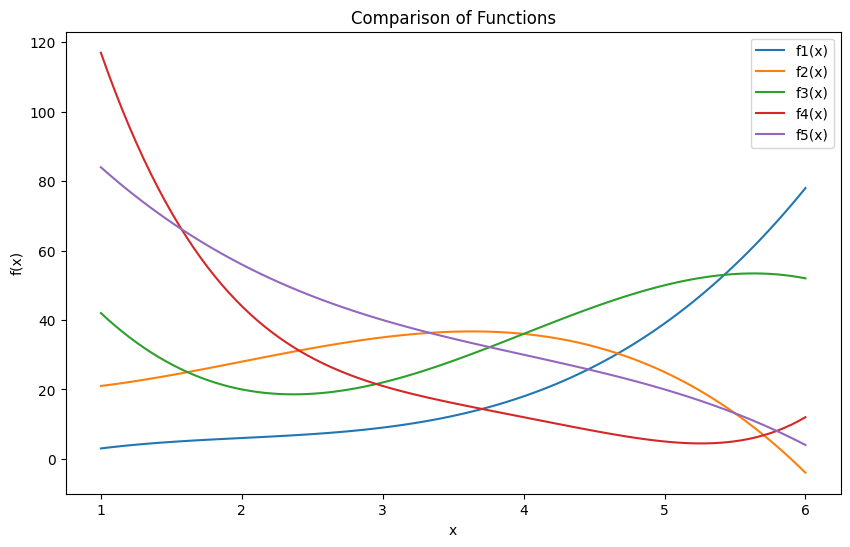

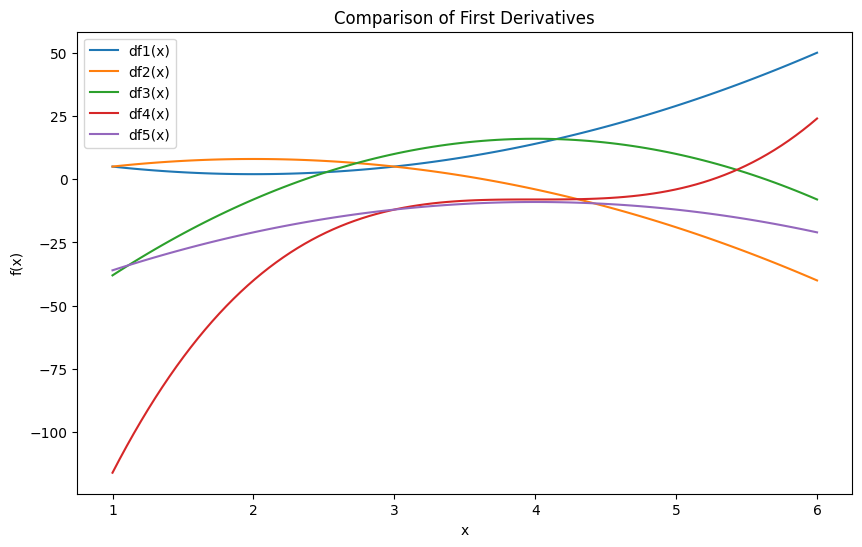

In [78]:
# plot the functions
functions = [
    ('f1(x)', f1),
    ('f2(x)', f2),
    ('f3(x)', f3),
    ('f4(x)', f4),
    ('f5(x)', f5)
]

a = 1
b = 6
n = 100
x = np.linspace(a, b, n)

plt.figure(figsize=(10, 6))

for label, func in functions:
    plt.plot(x, func(x), label=label)

plt.title('Comparison of Functions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# plot the first derivatives
df_functions = [
    ('df1(x)', df1),
    ('df2(x)', df2),
    ('df3(x)', df3),
    ('df4(x)', df4),
    ('df5(x)', df5)
]

a = 1
b = 6
n = 100
x = np.linspace(a, b, n)

plt.figure(figsize=(10, 6))

for label, func in df_functions:
    plt.plot(x, func(x), label=label)

plt.title('Comparison of First Derivatives')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Q6

* Copy your code to display the rectangles of the $L_{10}$ approximation of $$\int_1^6 x^2~dx$$ from Exercise 7 of the pre-lab into a code cell below.
* Modify as necessary to use your function instead.
* Run the code to show a plot of your function and the 10 rectangles of the approximation.

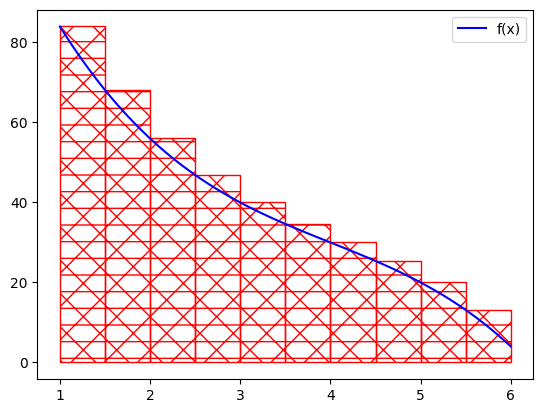

In [79]:
n = 10
a = 1
b = 6
deltax = (b-a)/n

xvalues = np.arange(a,b,deltax)

def f(x):
    return -x**3 + 12*x**2 - 57*x + 130

ax = plt.axes()

for x in xvalues:
  height = f(x)
  rect = patches.Rectangle((x,0), deltax, height, fill=False, color = 'red', hatch = '/-\\')
  ax.add_patch(rect)

x = np.linspace(a,b,100)
ax.plot(x,f(x), label = 'f(x)', color = 'blue')
ax.legend()
plt.show()